## Vectorizing Raw Data

### Introduction
**Vectorizing** is the process of encoding text as integers to create a feature vectors.
**Feature vector** is an n-dimensional vector of numerical features that represent some object.
**Notice that**:
 * when looking at a word, Python only sees a string of characters,
 * raw text needs to be converted to numbers so that Python and the algorithm used for machine learning can understand,
 
**Types of VEctorization**
 * Count vectorization
 * N-grams
 * Term frequency - inverse document frequency (TF-IDF)
the main difference between the three is what's in the actual cell of the matrix.

### Count vectorization 

Creates a document-term matrix where the entry of each cell will be a count of the number of times that word occurred in that document.

### Read in text

In [1]:
import pandas as pd
import re
import string
import nltk

pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() # lemmatizer is also possible, but PorterStemmer in here

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [2]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords] # already used before, but Stem here
    return text

### CountVectorizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(count_vect.get_feature_names()) #to print out all the unique words that are found across all of the text messages

(5567, 8104)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

As per above, the text has 5567 text messages, and 8104 unique words, which is 5567 rows and 8104 columns.

In [5]:
X_counts

<5567x8104 sparse matrix of type '<class 'numpy.int64'>'
	with 50122 stored elements in Compressed Sparse Row format>

### CountVectorizer to smaller sample

In [6]:
data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer=clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])
print(X_counts_sample.shape)
print(count_vect_sample.get_feature_names())

(20, 192)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'na

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [7]:
X_counts_sample

<20x192 sparse matrix of type '<class 'numpy.int64'>'
	with 218 stored elements in Compressed Sparse Row format>

In [8]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [9]:
# Let's see what column refers to:

X_counts_df.columns = count_vect_sample.get_feature_names()
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


### N-Grams 

Creates a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.

"NLP is an interesting topic"

| n | Name      | Tokens                                                         |
|---|-----------|----------------------------------------------------------------|
| 2 | bigram    | ["nlp is", "is an", "an interesting", "interesting topic"]      |
| 3 | trigram   | ["nlp is an", "is an interesting", "an interesting topic"] |
| 4 | four-gram | ["nlp is an interesting", "is an interesting topic"]    |

### CountVectorizer (w/ N-Grams)

In [16]:
# Create function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords]) # updated
    return text


data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))
data.head()

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2))
# ngram_range=(1,1) refers to only unigrams
# ngram_range=(1,2) refers to unigrams and brigrams
# ngram_range=(1,3) refers to unigrams, brigrams and trigrams
# ngram_range=(2,2) refers to only bigrams
X_counts = ngram_vect.fit_transform(data['cleaned_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5567, 31260)
['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q'

### CountVectorizer (w/ N-Grams) to smaller sample

In [18]:
data_sample = data[0:20]

ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])
print(X_counts_sample.shape)
print(ngram_vect_sample.get_feature_names())

(20, 198)
['09061701461 claim', '100 20000', '100000 prize', '11 month', '12 hour', '150pday 6day', '16 tsandc', '20000 pound', '2005 text', '21st may', '4txtú120 poboxox36504w45wq', '6day 16', '81010 tc', '87077 eg', '87077 trywal', '87121 receiv', '87575 cost', '900 prize', 'aft finish', 'aid patent', 'alright way', 'anymor tonight', 'appli 08452810075over18', 'appli repli', 'ard smth', 'around though', 'brother like', 'call 09061701461', 'call mobil', 'caller press', 'callertun caller', 'camera free', 'cash 100', 'chanc win', 'claim 81010', 'claim call', 'claim code', 'click httpwap', 'click wap', 'co free', 'code kl341', 'colour mobil', 'comp win', 'copi friend', 'cost 150pday', 'credit click', 'cri enough', 'csh11 send', 'cup final', 'custom select', 'da stock', 'date sunday', 'dont miss', 'dont think', 'dont want', 'eg england', 'eh rememb', 'england 87077', 'england macedonia', 'enough today', 'entitl updat', 'entri questionstd', 'entri wkli', 'even brother', 'fa 87121', 'fa cup

In [19]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names()
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,way meet,week free,win cash,win fa,winner valu,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


### TF-IDF

Creates a document-term matrix where the columns represent single unique terms (unigrams) but the cell represents a weighting meant to represent how important a word is to a document.

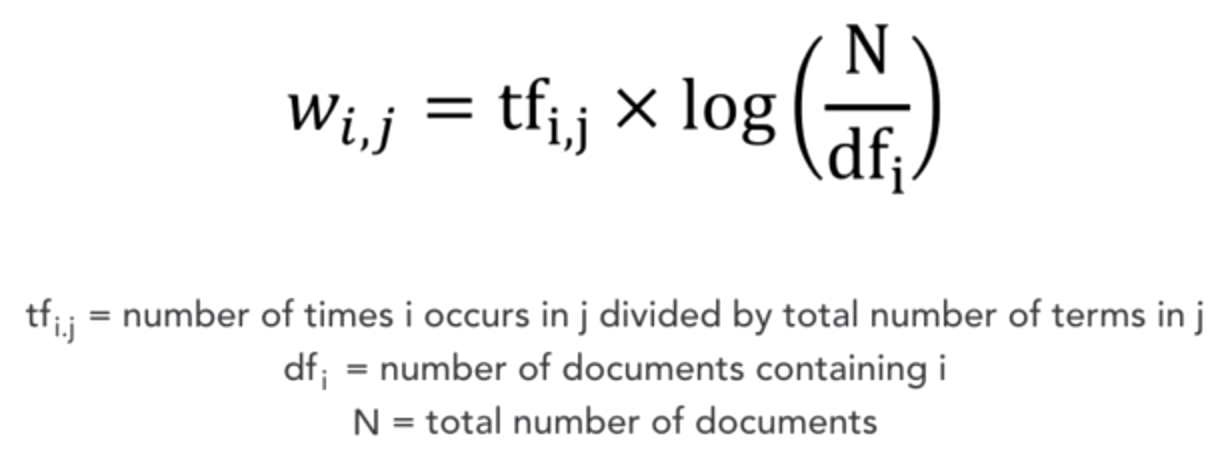



In [20]:
# Create function to remove punctuation, tokenize, remove stopwords, and stem
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### TfidfVectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5567, 8104)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

### TfidfVectorizer to smaller sample

In [22]:
data_sample = data[0:20]

tfidf_vect_sample = TfidfVectorizer(analyzer=clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])
print(X_tfidf_sample.shape)
print(tfidf_vect_sample.get_feature_names())

(20, 192)
['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'na

### Vectorizers output sparse matrices

_**Sparse Matrix**: A matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements._

In [23]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.197695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.252972,0.000000,0.252972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252972,0.252972,0.000000,0.000000,0.000000,0.000000
